<a href="https://colab.research.google.com/github/Jeferson-Aguero/Aprendendo-a-fazer-projeto-com-Colab/blob/main/ASIMOV_PROJETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Carrendo os dados - é possivel acessar direto pelo arquivo no google drive
caminho_dados = "/content/drive/MyDrive/Analise de dados - ASIMOV/2023_Viagem.csv"

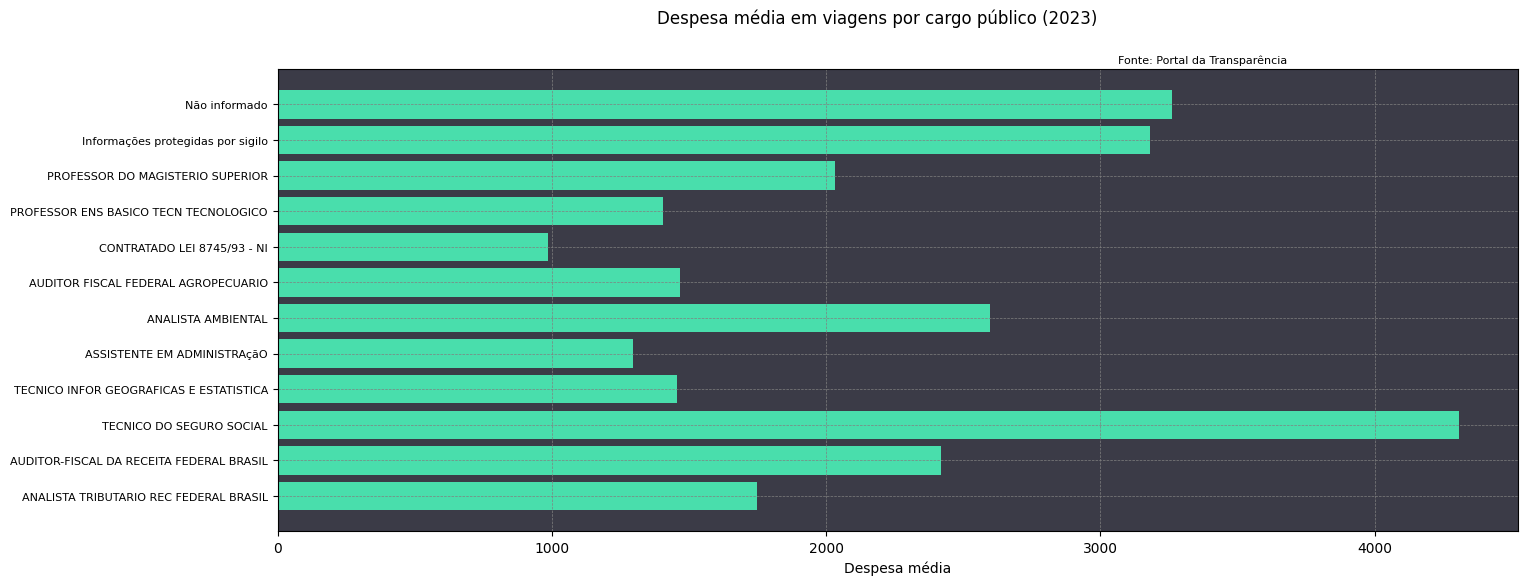

In [12]:
import pandas as pd

#mostrar todas as colunas
pd.set_option('display.max_columns', None)

#lendos os dados
df_viagens =pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";", decimal=",")

#Criando nova coluna chamada despesas
df_viagens["despesas"] = df_viagens["Valor diárias"] + df_viagens["Valor outros gastos"] + df_viagens["Valor passagens"]

#Ajustando os valores nulos na coluna de cargos
df_viagens["Cargo"] = df_viagens["Cargo"].fillna("Não informado")

#convertendo colunas em datas

df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"],format="%d/%m/%Y", errors="coerce")
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"],format="%d/%m/%Y",errors="coerce")

#Criando novas colunas de datas
df_viagens["Mês da viagem"] = df_viagens["Período - Data de início"].dt.month_name()
df_viagens["Dias de viagem"] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days


# Criando tabela consolidada
df_viagens_consolidado = (df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media=('despesas', 'mean'),
        duracao_media=('Dias de viagem', 'mean'),
        despesas_totais=('despesas', 'sum'),
        destino_mais_frequente=('Destinos', pd.Series.mode),
        n_viagens=('Nome', 'count')
    )
    .reset_index()
    .sort_values(by='despesas_totais', ascending=False))

# Filtrando tabela consolidada por cargos relevantes (> 1% das viagens)
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

# Chegando na tabela final consolidada e filtrada
df_final = df_viagens_consolidado[filtro].sort_values(by='n_viagens', ascending=False)

# formatar todos os numeros para o formato de 2 casas decimais
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib.pyplot as plt

# Criando a figura
fig, ax = plt.subplots(figsize=(16, 6))

# Plotando o gráfico
ax.barh(df_final['Cargo'], df_final['despesa_media'], color="#49deac")
ax.invert_yaxis()

# Ajustando o gráfico
ax.set_facecolor('#3b3b47')
fig.suptitle('Despesa média em viagens por cargo público (2023)')
plt.figtext(0.65, 0.89, 'Fonte: Portal da Transparência', fontsize=8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.yticks(fontsize=8)
plt.xlabel('Despesa média')

# Exibindo o gráfico
plt.show()

